In [7]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
print(os.getcwd())

c:\Users\marco\Desktop\Masteroppgave\Kode\seismic-source-classification\notebooks


In [21]:
h5_path = "../data/raw/tomasov/data/car/auto_2023-04-17T124152+0100.h5"
with h5py.File(h5_path, "r") as f:
    print("Keys:", list(f.keys()))
    print("Acquisition group keys:", list(f['Acquisition'].keys()))
    print("Raw[0] group keys:", list(f['Acquisition']['Raw[0]'].keys()))

Keys: ['Acquisition']
Acquisition group keys: ['Custom', 'Raw[0]']
Raw[0] group keys: ['Custom', 'RawData', 'RawDataTime']


In [22]:
h5_path = "../data/raw/tomasov/data/car/auto_2023-04-17T124152+0100.h5"
with h5py.File(h5_path, "r") as f:
    data = f['Acquisition']['Raw[0]']['RawData'][:]  # This is likely your waveform data
    print("RawData shape:", data.shape)

RawData shape: (2336800, 1700)


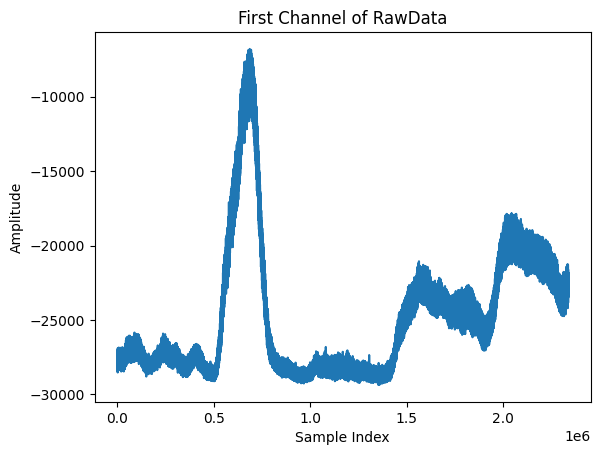

In [23]:
import matplotlib.pyplot as plt

# Plot the first channel (column)
plt.plot(data[:, 0])
plt.title("First Channel of RawData")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

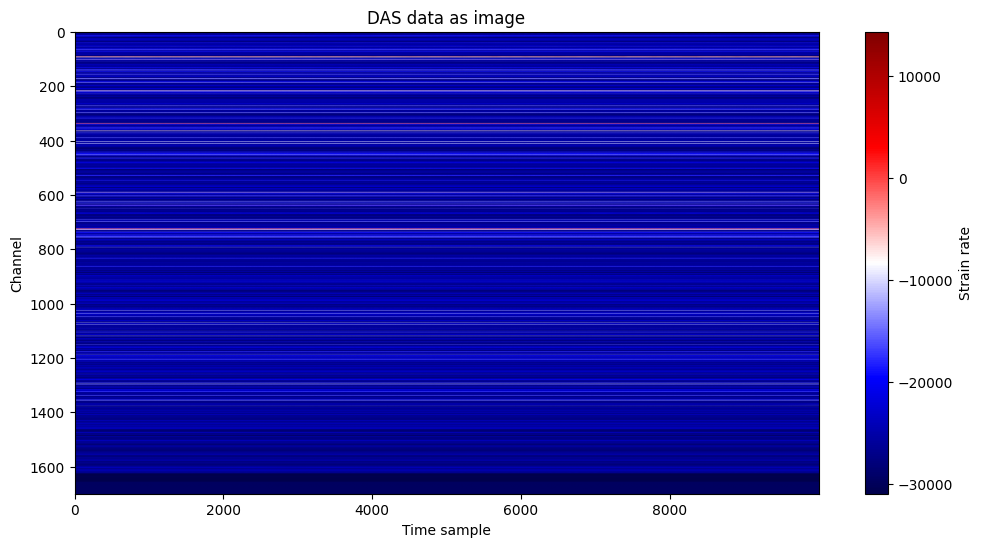

In [26]:
plt.figure(figsize=(12,6))
plt.imshow(data[:10000, :].T, aspect='auto', cmap='seismic')  # transpose to have channels vertical
plt.colorbar(label='Strain rate')
plt.xlabel("Time sample")
plt.ylabel("Channel")
plt.title("DAS data as image")
plt.show()


In [33]:
with h5py.File(h5_path, "r") as f:
    custom_attrs = f['Acquisition']['Raw[0]']['Custom'].attrs
    for k, v in custom_attrs.items():
        print(k, v)


In [31]:
import numpy as np

npy_path = h5_path.replace(".h5", ".npy")
labels = np.load(npy_path)
print("Labels shape:", labels.shape)
print("Unique label values:", np.unique(labels))


Labels shape: (1141, 1700)
Unique label values: [False  True]


In [34]:
num_windows = 1141
window_size = 8192
hop = 2048
covered_samples = (num_windows - 1) * hop + window_size
print("Covered samples:", covered_samples)


Covered samples: 2342912


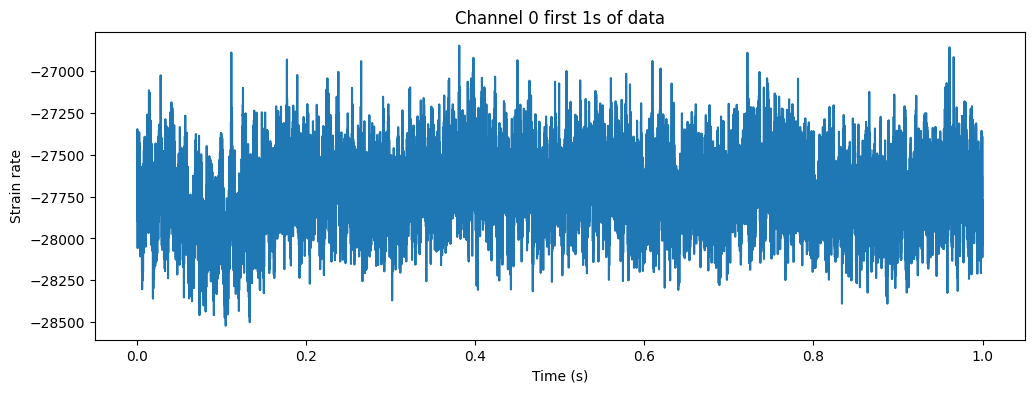

In [ ]:
import matplotlib.pyplot as plt

channel = 0  # choose a channel
samples = data[:20000, channel]  # first 20k samples
time_axis = np.arange(len(samples)) / 20000  # if sample rate is 20 kHz

plt.figure(figsize=(12, 4))
plt.plot(time_axis, samples)
plt.title(f"Channel {channel} first 1s of data")
plt.xlabel("Time (s)")
plt.ylabel("Strain rate")
plt.show()


Found 363 positive windows out of 1141 total.


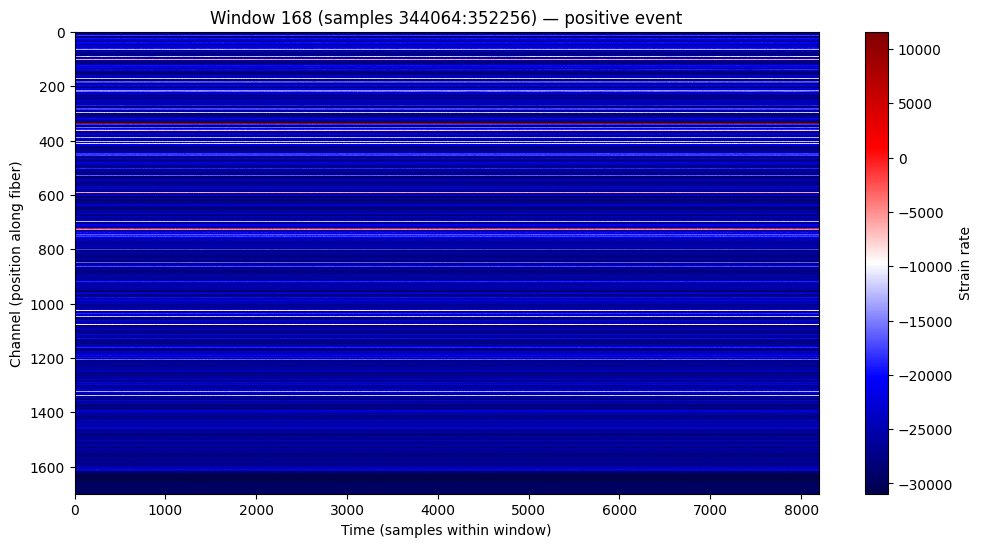

Active channels in this window: [220 221 222 223 224 225 226 227 228 229]...


In [35]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import random

# Load raw data
h5_path = "../data/raw/tomasov/data/car/auto_2023-04-17T124152+0100.h5"
with h5py.File(h5_path, "r") as f:
    data = f['Acquisition']['Raw[0]']['RawData'][:]

# Load labels
labels = np.load(h5_path.replace(".h5", ".npy"))

window_size = 8192
hop = 2048

# Step 1: Find indices of windows that contain any event
positive_window_indices = np.where(labels.any(axis=1))[0]
print(f"Found {len(positive_window_indices)} positive windows out of {labels.shape[0]} total.")

# Step 2: Pick one random positive window
random_window = random.choice(positive_window_indices)
start = random_window * hop
end = start + window_size

# Step 3: Extract that slice from raw data
window_data = data[start:end, :]  # shape: (8192, 1700)

# Step 4: Plot as an image
plt.figure(figsize=(12, 6))
plt.imshow(window_data.T, aspect='auto', cmap='seismic', interpolation='nearest')
plt.colorbar(label='Strain rate')
plt.title(f"Window {random_window} (samples {start}:{end}) — positive event")
plt.xlabel("Time (samples within window)")
plt.ylabel("Channel (position along fiber)")
plt.show()

# Optional: show which channels are labeled True
active_channels = np.where(labels[random_window])[0]
print(f"Active channels in this window: {active_channels[:10]}{'...' if len(active_channels)>10 else ''}")


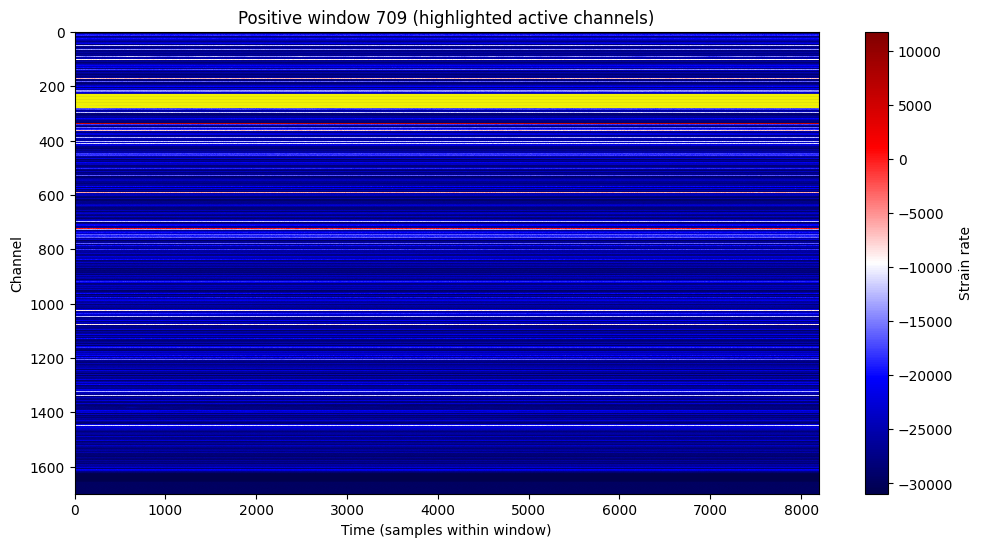

Active channels in this window: [227 228 229 230 231 232 233 234 235 236]...


In [38]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import random

h5_path = "../data/raw/tomasov/data/car/auto_2023-04-17T124152+0100.h5"

# Load data & labels
with h5py.File(h5_path, "r") as f:
    data = f['Acquisition']['Raw[0]']['RawData'][:]
labels = np.load(h5_path.replace(".h5", ".npy"))

window_size = 8192
hop = 2048

# Find all positive windows
positive_window_indices = np.where(labels.any(axis=1))[0]

# Pick a random positive window
random_window = random.choice(positive_window_indices)
start = random_window * hop
end = start + window_size

# Extract raw data for this window
window_data = data[start:end, :]

# Find active channels (where label is True)
active_channels = np.where(labels[random_window])[0]

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(window_data.T, aspect='auto', cmap='seismic', interpolation='nearest')
plt.colorbar(label="Strain rate")
plt.title(f"Positive window {random_window} (highlighted active channels)")
plt.xlabel("Time (samples within window)")
plt.ylabel("Channel")

# Overlay active channels as horizontal lines
for ch in active_channels:
    plt.axhline(y=ch, color='yellow', alpha=0.5, linewidth=0.8)

plt.show()

print(f"Active channels in this window: {active_channels[:10]}{'...' if len(active_channels)>10 else ''}")
